In [14]:
import os
import cv2 
import numpy as np

input_dir = 'file direc'
output_dir = f'{input_dir}\\Output'
os.makedirs(output_dir, exist_ok=True)

# Add Gaussian noise
def add_gaussion_noise(image, mean=0, var=10):
    row, col, ch=image.shape
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

# Loop through all images in the input directory
for filename in os.listdir(input_dir):
    print(f'filename {filename}')
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        # Load the image
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Check if image was loaded properly
        if image is None:
            print(f"Error loading {image_path}")
            continue

        # Experiment with different variances
        for var in [10, 20, 30]:
            # Add Gaussian noise to the image
            noisy_image = add_gaussion_noise(image, var=var)

            output_path = os.path.join(output_dir, f'noisy_var{var}_{filename}')
            cv2.imwrite(output_path, noisy_image)

    print("Completed adding Gaussian noise to all iamges")


filename aug_0_1521.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_162.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_2589.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_2974.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_3146.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_3501.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_43.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_4443.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_5506.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_5787.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_5823.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_6021.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_6555.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_6955.jpg
Completed adding Gaussian noise to all iamges
filename aug_0_7085.jpg

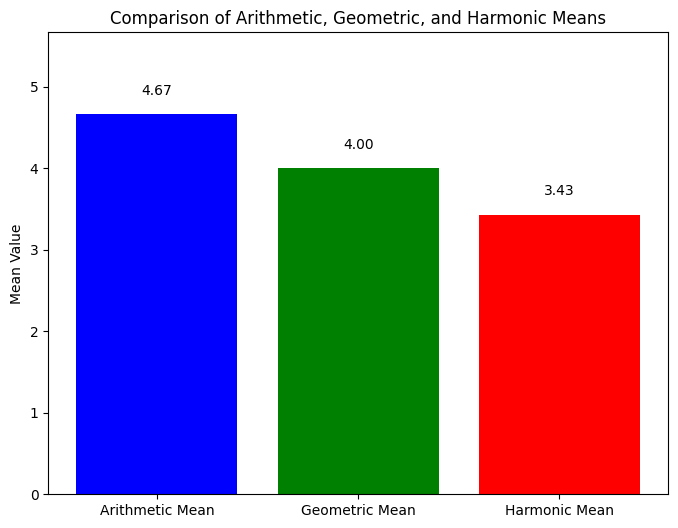

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Given numbers
numbers = np.array([2, 4, 8])

# Calculate means
arithmetic_mean = np.mean(numbers)
geometric_mean = np.prod(numbers) ** (1/len(numbers))
harmonic_mean = len(numbers) / np.sum(1/numbers)

# Means
means = [arithmetic_mean, geometric_mean, harmonic_mean]
mean_labels = ['Arithmetic Mean', 'Geometric Mean', 'Harmonic Mean']

# Plot
plt.figure(figsize=(8, 6))
plt.bar(mean_labels, means, color=['blue', 'green', 'red'])
plt.ylabel('Mean Value')
plt.title('Comparison of Arithmetic, Geometric, and Harmonic Means')
plt.ylim(0, max(means) + 1)

# Annotate means on the bars
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'{mean:.2f}', ha='center', va='bottom')

plt.show()
